In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

from sklearn.linear_model import LogisticRegression

In [52]:
data = pd.read_csv('numeric_dataset.csv')

The score of the model = 0.9835164835164835


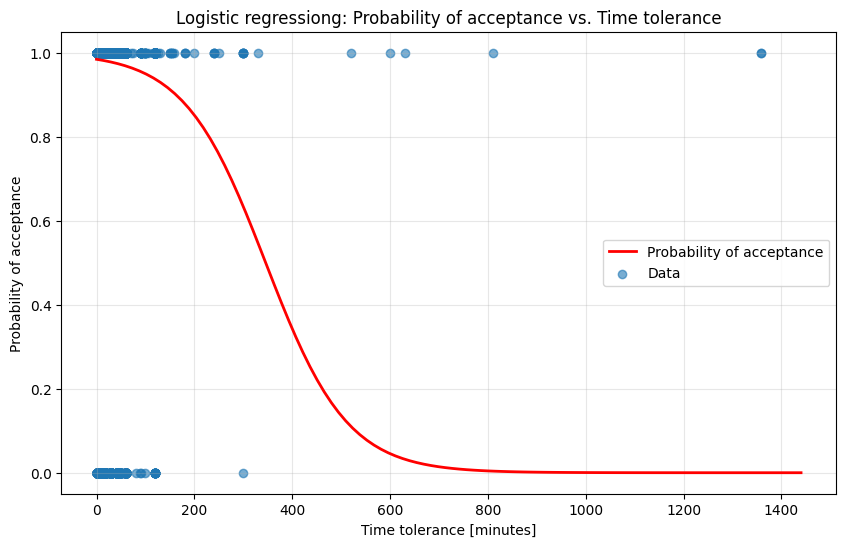

In [53]:
x = data[['Tolerance']].values.reshape(-1,1)
y = data['Approved'].values

#split data in test and train data
x_train, x_test, y_train, y_test = train_test_split(x , y, test_size= 0.01)

#train model
model = LogisticRegression()
model.fit(x_train, y_train)

print(f'The score of the model = {model.score(x_test, y_test)}')
x_axis = np.linspace(0,1440,100).reshape(-1,1)
y_prob = model.predict_proba(x_axis)[:, 1]

plt.figure(figsize=(10,6))
plt.plot(x_axis, y_prob, color="red", linewidth=2, label='Probability of acceptance')
plt.scatter(x, y, alpha=0.6, label='Data')
plt.xlabel('Time tolerance [minutes]')
plt.ylabel('Probability of acceptance')
plt.title('Logistic regressiong: Probability of acceptance vs. Time tolerance')
plt.legend()
plt.grid(True, alpha=0.3)

The score of the model = 0.9739010989010989


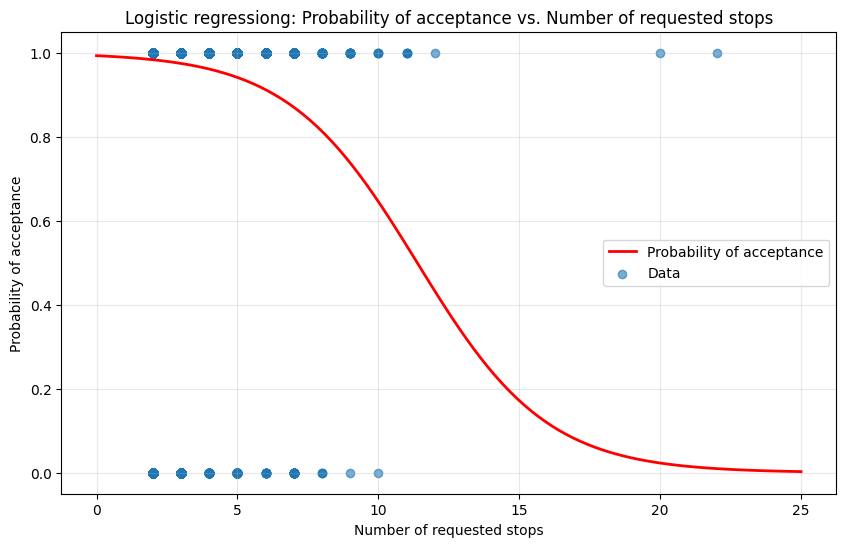

In [67]:
x1 = data[['Requested_stops']].values.reshape(-1,1)
y1 = data['Approved'].values

#split data in test and train data
x1_train, x1_test, y1_train, y1_test = train_test_split(x1 , y1, test_size= 0.01)

#train model
model = LogisticRegression()
model.fit(x1_train, y1_train)

print(f'The score of the model = {model.score(x1_test, y1_test)}')

x1_axis = np.linspace(0,25,100).reshape(-1,1)
y1_prob = model.predict_proba(x1_axis)[:, 1]

plt.figure(figsize=(10,6))
plt.plot(x1_axis, y1_prob, color="red", linewidth=2, label='Probability of acceptance')
plt.scatter(x1, y1, alpha=0.6, label='Data')
plt.xlabel('Number of requested stops')
plt.ylabel('Probability of acceptance')
plt.title('Logistic regressiong: Probability of acceptance vs. Number of requested stops')
plt.legend()
plt.grid(True, alpha=0.3)


The score of the model = 0.9848901098901099


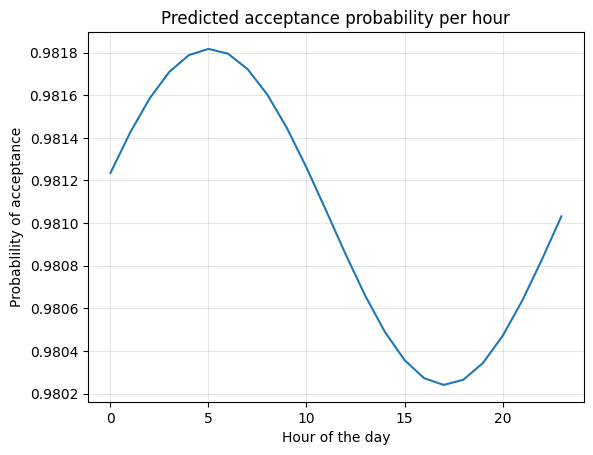

In [68]:
x2 = data[['Hour_sin', 'Hour_cos']].values
y2 = data['Approved'].values

#split data in test and train data
x2_train, x2_test, y2_train, y2_test = train_test_split(x2 , y2, test_size= 0.01)


# Model trainen
model = LogisticRegression()
model.fit(x2_train, y2_train)

print(f'The score of the model = {model.score(x2_test, y2_test)}')

hours = np.arange(0, 24)
hour_sin = np.sin(2 * np.pi * hours / 24)
hour_cos = np.cos(2 * np.pi * hours / 24)

x2_pred = np.column_stack((hour_sin, hour_cos))
y2_prob = model.predict_proba(x2_pred)[:, 1]

plt.plot(hours, y2_prob)
plt.xlabel("Hour of the day")
plt.ylabel("Probablility of acceptance")
plt.title("Predicted acceptance probability per hour")
plt.grid(True, alpha=0.3)
plt.show()

The score of the model = 0.9862637362637363


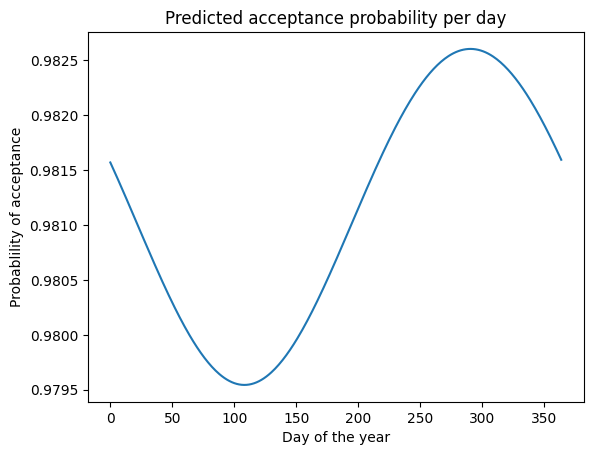

In [56]:
x3 = data[['Day_sin', 'Day_cos']].values
y3 = data['Approved'].values

#split data in test and train data
x3_train, x3_test, y3_train, y3_test = train_test_split(x3 , y3, test_size= 0.01)

# Model trainen
model = LogisticRegression()
model.fit(x3_train, y3_train)

print(f'The score of the model = {model.score(x3_test, y3_test)}')

days = np.arange(0, 365)
day_sin = np.sin(2 * np.pi * days / 365)
day_cos = np.cos(2 * np.pi * days / 365)

x3_pred = np.column_stack((day_sin, day_cos))
y3_prob = model.predict_proba(x3_pred)[:, 1]

plt.plot(days, y3_prob)
plt.xlabel("Day of the year")
plt.ylabel("Probablility of acceptance")
plt.title("Predicted acceptance probability per day")
plt.show()

In [57]:
# Tried to do something with the stopping location, but this is hard...


#use only columns of the stops
stops_columns = data.drop(columns=['Process_type', 'Stabling', 'Tolerance', 'Day_sin', 'Day_cos',
       'Hour_sin', 'Hour_cos', 'Hour_group', 'Requested_stops','Approved'])
stops_columns = stops_columns.columns.tolist()

x4 = data[stops_columns].values
y4 = data['Approved'].values

#spot data in test and train data
x4_train, x4_test, y4_train, y4_test = train_test_split(x4, y4, test_size=0.01)

model = LogisticRegression()
model.fit(x4_train, y4_train)

print(f'The score of the model = {model.score(x4_test, y4_test)}')




The score of the model = 0.9793956043956044


The score of the model = 0.9711538461538461
Probability of acceptance without stabling: 98.23%
Probability of acceptance with stabling: 97.75%


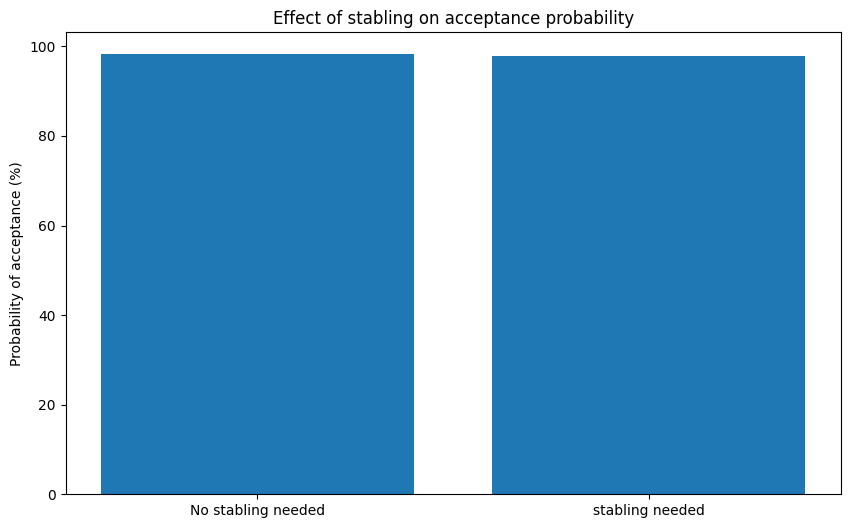

In [62]:
x5 = data[['Stabling']].values
y5 = data['Approved'].values

# Split data in test en train data
x5_train, x5_test, y5_train, y5_test = train_test_split(x5, y5, test_size=0.01)

# Train model
model = LogisticRegression()
model.fit(x5_train, y5_train)

print(f'The score of the model = {model.score(x5_test, y5_test)}')

# Predict probability
x5_axis = np.array([[0], [1]])  
y5_prob = model.predict_proba(x5_axis)[:, 1]

print(f'Probability of acceptance without stabling: {y5_prob[0]:.2%}')
print(f'Probability of acceptance with stabling: {y5_prob[1]:.2%}')

# Visualiseer het verschil
plt.figure(figsize=(10, 6))
plt.bar(['No stabling needed', 'stabling needed'], y5_prob * 100)
plt.ylabel('Probability of acceptance (%)')
plt.title('Effect of stabling on acceptance probability')
plt.show()